In [16]:
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler

centers = [[1,1],[-1,-1],[1,-1]]
X, labels_true = make_blobs(
    n_samples=750,
    centers=centers,cluster_std=0.4,random_state=0
)
X = StandardScaler().fit_transform(X)

In [17]:
X

array([[ 0.49426097,  1.45106697],
       [-1.42808099, -0.83706377],
       [ 0.33855918,  1.03875871],
       ...,
       [-0.05713876, -0.90926105],
       [-1.16939407,  0.03959692],
       [ 0.26322951, -0.92649949]], shape=(750, 2))

In [18]:
import pandas as pd

In [19]:
df = pd.read_csv(r"D:\DBSCAN\DATA_SET\wine_clustering_data.csv")
df.head()

,alcohol,malic_acid,ash,ash_alcanity,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280,proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [20]:
df.describe()

,alcohol,malic_acid,ash,ash_alcanity,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280,proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   alcohol               178 non-null    float64
 1   malic_acid            178 non-null    float64
 2   ash                   178 non-null    float64
 3   ash_alcanity          178 non-null    float64
 4   magnesium             178 non-null    int64  
 5   total_phenols         178 non-null    float64
 6   flavanoids            178 non-null    float64
 7   nonflavanoid_phenols  178 non-null    float64
 8   proanthocyanins       178 non-null    float64
 9   color_intensity       178 non-null    float64
 10  hue                   178 non-null    float64
 11  od280                 178 non-null    float64
 12  proline               178 non-null    int64  
dtypes: float64(11), int64(2)
memory usage: 18.2 KB


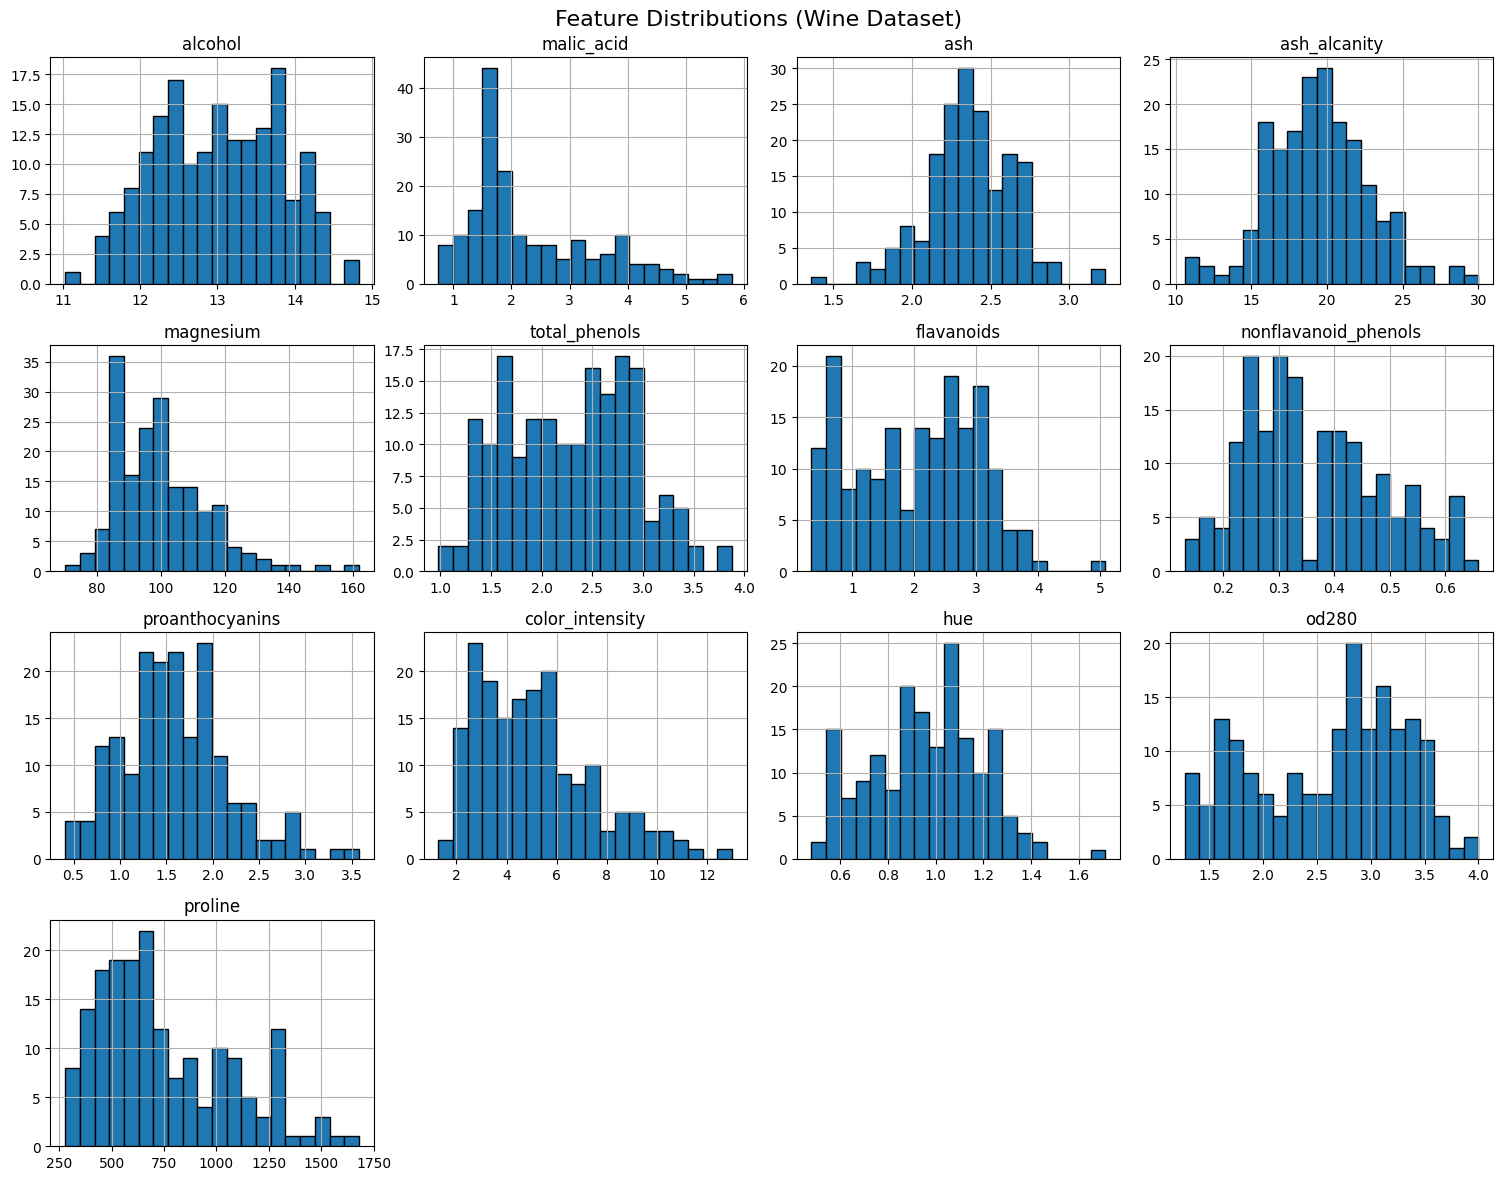

In [22]:
import matplotlib.pyplot as plt
df.hist(
    figsize=(15, 12),bins=20,edgecolor='black'
)

plt.suptitle("Feature Distributions (Wine Dataset)", fontsize=16)
plt.tight_layout()
plt.show()

In [23]:
from sklearn.preprocessing import StandardScaler
X = df.drop("proline", axis=1)
y=df['proline']
model=StandardScaler()
x_scaled=model.fit_transform(X)

In [24]:

from sklearn.cluster import DBSCAN
dbscan = DBSCAN(eps=2, min_samples=2)
cluster_labels = dbscan.fit_predict(x_scaled)
cluster_labels


array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  1,  0,  0,
        0,  0,  0,  0, -1,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  2,  0,  2,  0,  2,  0,  0,  0,  0, -1,
        0,  0,  0,  0,  0,  0,  0,  0, -1, -1, -1,  0,  3, -1,  0, -1,  0,
       -1, -1, -1, -1, -1, -1,  4, -1, -1, -1, -1, -1,  0,  0,  0, -1,  5,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  4, -1, -1,  0,  3, -1,  0,  0,
        0,  0,  0, -1,  0,  0,  0,  5, -1,  0, -1,  0,  0, -1,  0,  0, -1,
       -1,  0, -1, -1, -1, -1,  0,  0, -1,  0, -1, -1,  6,  6,  6,  7,  7,
       -1, -1,  7,  8,  8,  6,  8,  7, -1,  6, -1,  7,  7,  7,  7,  7, -1,
        7,  7,  7,  7, -1,  9,  9,  7,  8,  8,  6,  7,  7,  7,  7,  7, -1,
        6,  7,  7,  7,  7,  7,  7, -1])

In [25]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(x_scaled)

In [26]:
from sklearn.cluster import DBSCAN
dbscan = DBSCAN(eps=0.8, min_samples=5)
cluster_labels = dbscan.fit_predict(X_pca)
df['cluster'] = cluster_labels

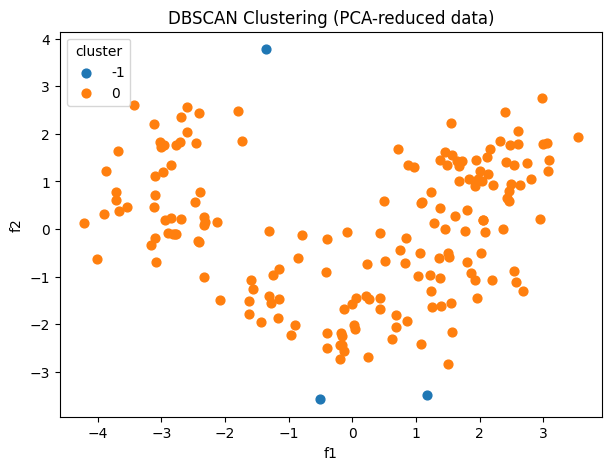

In [27]:
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(7, 5))

for cluster in np.unique(cluster_labels):
    plt.scatter(
        X_pca[cluster_labels == cluster, 0],
        X_pca[cluster_labels == cluster, 1],
        label=str(cluster),
        s=40
    )

plt.xlabel("f1")
plt.ylabel("f2")
plt.title("DBSCAN Clustering (PCA-reduced data)")
plt.legend(title="cluster")
plt.show()

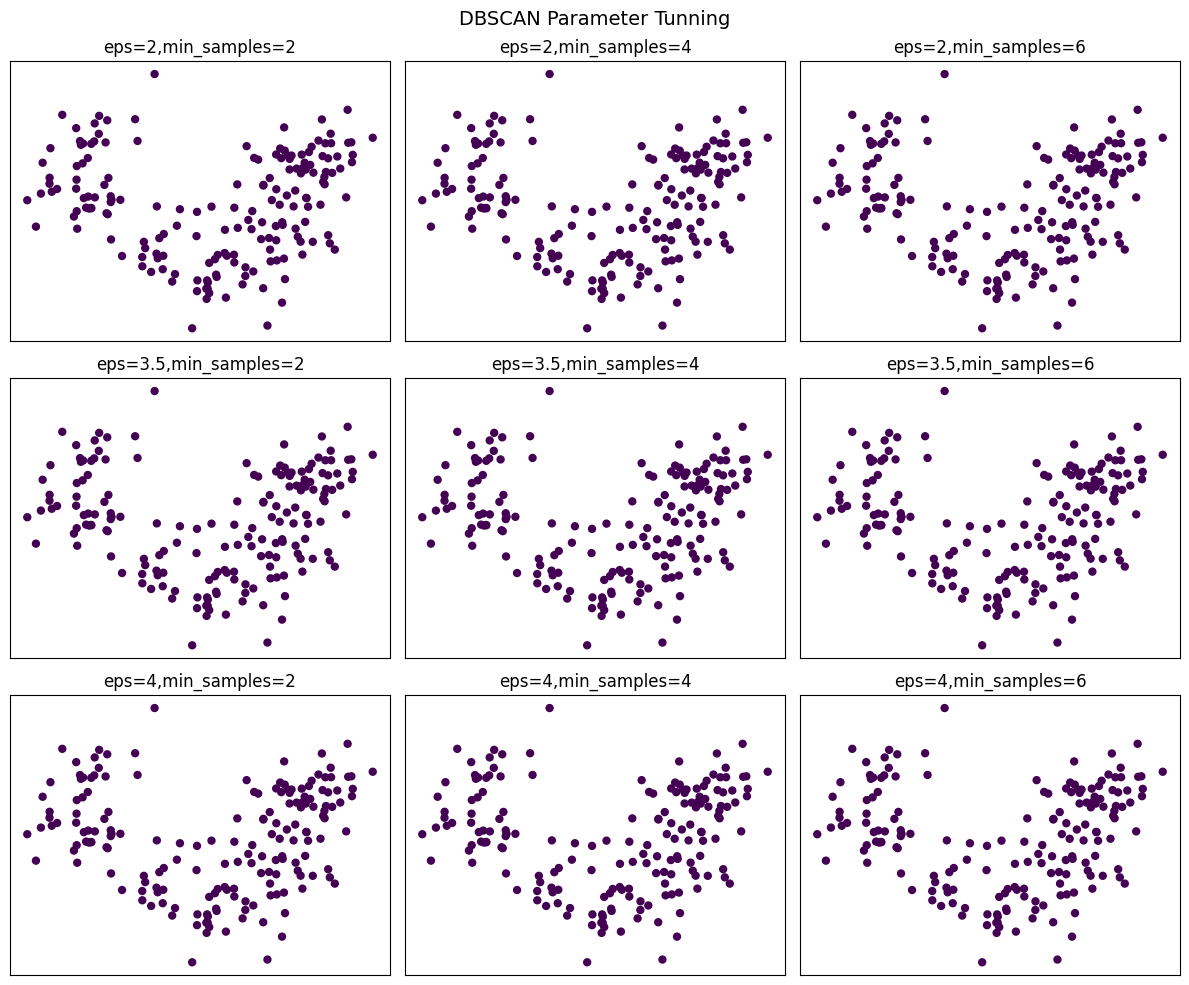

In [28]:
# Task 4: Parameter Tuning
from sklearn.cluster import DBSCAN
import numpy as np
import matplotlib.pyplot as plt

eps_values = [2, 3.5, 4]
min_samples_values = [2, 4, 6]
fig, axes = plt.subplots(
    len(eps_values),
    len(min_samples_values),
    figsize=(12, 10)
)

for i, eps in enumerate(eps_values):
    for j, min_s in enumerate(min_samples_values):
        dbscan = DBSCAN(eps=eps, min_samples=min_s)
        labels = dbscan.fit_predict(X_pca)

        axes[i, j].scatter(
            X_pca[:, 0],
            X_pca[:, 1],
            c=labels,
            s=25
        )

        axes[i, j].set_title(f"eps={eps},min_samples={min_s}")
        axes[i, j].set_xticks([])
        axes[i, j].set_yticks([])
plt.suptitle("DBSCAN Parameter Tunning",fontsize=14)
plt.tight_layout()
plt.show()

In [29]:
import pickle
with open("scaler.pkl", "wb") as f:
    pickle.dump(model, f, protocol=pickle.HIGHEST_PROTOCOL)
with open("pca.pkl", "wb") as f:
    pickle.dump(pca, f, protocol=pickle.HIGHEST_PROTOCOL)
with open("dbscan_labels.pkl", "wb") as f:
    pickle.dump(cluster_labels, f, protocol=pickle.HIGHEST_PROTOCOL)
with open("X_pca.pkl", "wb") as f:
    pickle.dump(X_pca, f, protocol=pickle.HIGHEST_PROTOCOL)
print("🍷 Pickle files saved successfully")

🍷 Pickle files saved successfully
